# Logistic Regression

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.
Linear regression model range from negative to positive infinity. Therefore, predictions of linear regression don’t really make sense for a classification problem.

Data is taken from 
<a href="https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression">link</a>

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [358]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [360]:
df.corr()["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

<AxesSubplot:>

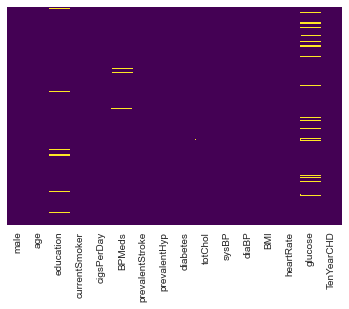

In [361]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=False,cmap='viridis')

In [362]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

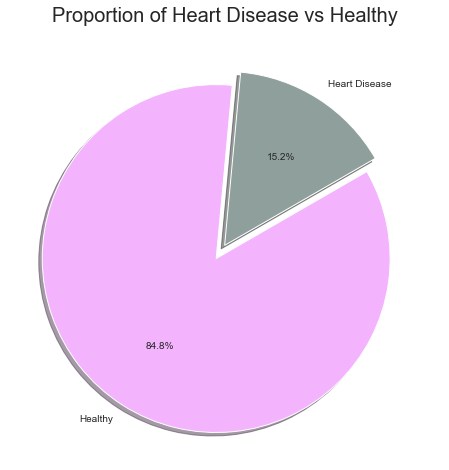

In [392]:
labels = 'Heart Disease', 'Healthy'
sizes = [df.TenYearCHD[df["TenYearCHD"]==1].count(), df.TenYearCHD[df["TenYearCHD"]==0].count()]
explode = (0, 0.09)
colors = ['#8f9f9c','#f4b3fd']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=30, colors=colors)
#ax1.axis('equal')
plt.title("Proportion of Heart Disease vs Healthy", size = 20)
plt.show()

In [393]:
sns.set_palette("Set1", 8, .75)
sns.set_style('whitegrid')

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

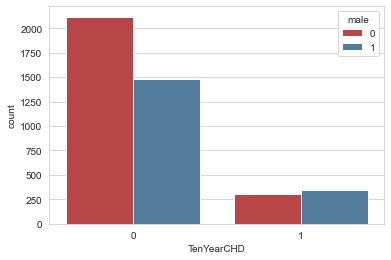

In [394]:
sns.countplot(x = 'TenYearCHD', hue = 'male', data= df )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

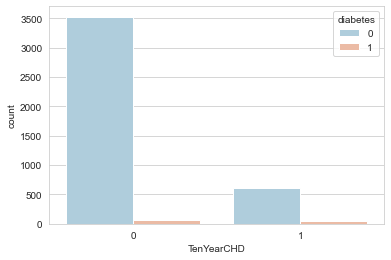

In [395]:
sns.countplot(x = 'TenYearCHD', hue = 'diabetes', data= df, palette='RdBu_r' )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

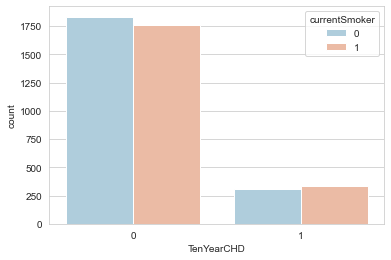

In [396]:
sns.countplot(x = 'TenYearCHD', hue = 'currentSmoker', data= df, palette='RdBu_r' )

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

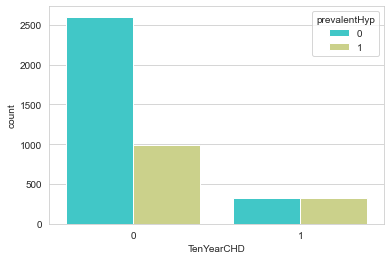

In [397]:
sns.countplot(x = 'TenYearCHD', hue = 'prevalentHyp', data= df, palette='rainbow' )

In [398]:
df['age'].max()

70

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

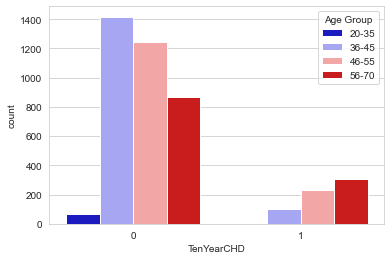

In [399]:
df['Age Group'] = pd.cut(df['age'],bins=[20,35,45,55,71],labels=['20-35','36-45','46-55','56-70'])
df.head()
sns.countplot(x = 'TenYearCHD', hue = 'Age Group', data= df, palette='seismic' )

In [400]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55


In [401]:
df['BMI'].iplot(kind='hist',bins=50,color='green')

### Cleaning the data
**Imputation: Replacing the missing data with some substitute value to retain most of the data/information of the dataset**

<AxesSubplot:>

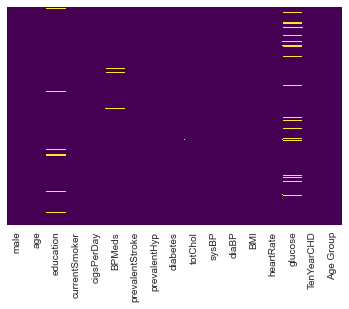

In [402]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=False,cmap='viridis')

In [403]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55


In [404]:
newdf = df[(df['BPMeds']==1)]
newdf.describe()
newdf

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
13,0,41,3.0,0,0.0,1.0,0,1,0,332.0,124.0,88.0,31.31,65.0,84.0,0,36-45
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1,46-55
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1,46-55
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0,36-45
158,0,49,3.0,0,0.0,1.0,0,1,0,254.0,191.0,124.5,28.35,78.0,54.0,0,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,56,2.0,0,0.0,1.0,0,1,0,260.0,158.0,102.5,26.89,90.0,88.0,0,56-70
4158,0,69,2.0,0,0.0,1.0,0,1,0,220.0,143.0,81.0,26.27,60.0,77.0,0,56-70
4168,0,62,1.0,0,0.0,1.0,0,1,0,325.0,180.0,108.0,35.16,75.0,81.0,0,56-70
4194,1,65,1.0,1,20.0,1.0,0,1,0,246.0,179.0,96.0,19.34,95.0,76.0,1,56-70


**it turns out that BPMeds and prevalentHyp are following the same trend**

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

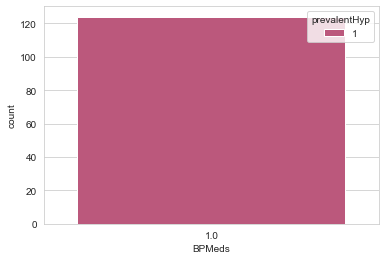

In [405]:
sns.countplot(x = 'BPMeds', hue = 'prevalentHyp', data= newdf, palette='plasma' )

In [406]:
def impute_func(cols):
    BPmeds = cols[0]
    prev = cols[1]
    if pd.isnull(BPmeds):
        if prev == 1:
            return 1
        else:
            return 0
    else:
        return BPmeds

In [407]:
df['BPMeds'] = df[['BPMeds', 'prevalentHyp']].apply(impute_func,axis=1)

<AxesSubplot:>

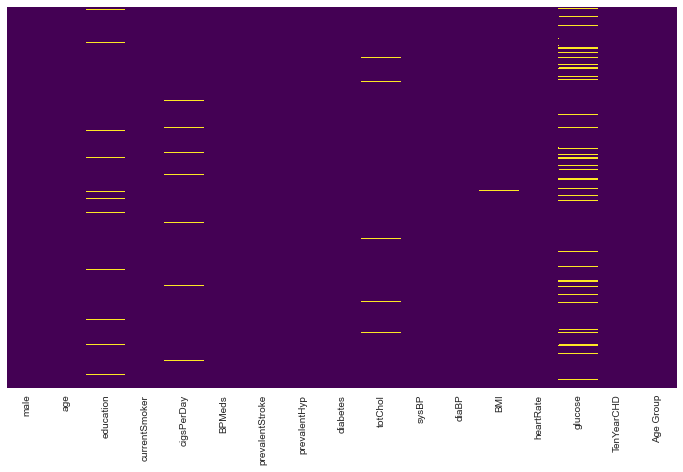

In [408]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels= False, cbar=False,cmap='viridis')

**we drop the NA data from columns except for glucose**

In [409]:
# isnull==False and notnull==True (both work)
DF = df[(pd.isnull(df["education"])==False) & (pd.notnull(df["cigsPerDay"])==True)& (pd.notnull(df["BMI"])==True)
       & (pd.notnull(df["totChol"])==True) & (pd.notnull(df["heartRate"])==True)]
DF

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,46-55
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,46-55
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,46-55
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,36-45


<AxesSubplot:>

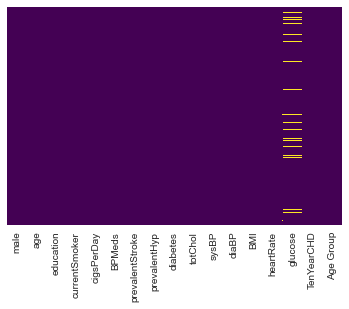

In [410]:
sns.heatmap(DF.isnull(), yticklabels= False, cbar=False,cmap='viridis')

In [411]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(DF[['glucose']])
imputed_train_df = imp_mean.transform(DF[['glucose']])

imputed_train_df

array([[ 77.],
       [ 76.],
       [ 70.],
       ...,
       [ 86.],
       [ 75.],
       [107.]])

In [412]:
arrey = []
for i in imputed_train_df:
    arrey.append(i[0])


In [413]:
DF['glucose']= arrey

In [414]:
## the other way to make it :  df["glucose"].fillna(df["glucose"].mean(),inplace =True)

In [415]:
DF.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36-45
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,46-55
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,46-55
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,56-70
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46-55


<AxesSubplot:>

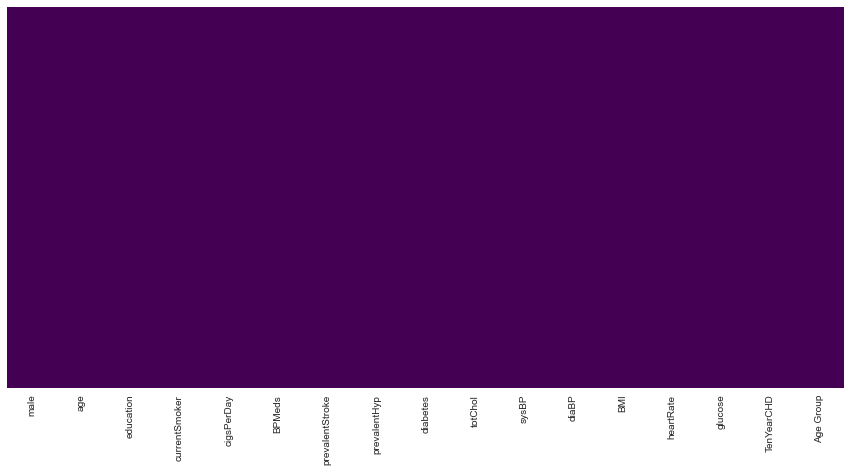

In [416]:
plt.figure(figsize=(15, 7))
sns.heatmap(DF.isnull(), yticklabels= False, cbar=False,cmap='viridis')

** Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [417]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
DF[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]]= ss.fit_transform(DF[["cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose","age"]])
DF.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age Group
0,1,-1.231851,4.0,0,-0.756031,0.0,0,0,0,-0.944194,-1.195012,-1.080540,0.293864,0.342285,-0.187760,0,36-45
1,0,-0.412732,2.0,0,-0.756031,0.0,0,0,0,0.302043,-0.513255,-0.157180,0.725042,1.586576,-0.231432,0,46-55
2,1,-0.178698,1.0,1,0.922192,0.0,0,0,0,0.188749,-0.217828,-0.241122,-0.105465,-0.072478,-0.493463,0,46-55


### Logistic Regression Model

In [418]:
from sklearn.model_selection import train_test_split
X = DF.drop(['TenYearCHD','Age Group'],axis=1)
Y = DF['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [419]:
from sklearn.linear_model import LogisticRegression

In [420]:
lm = LogisticRegression()

In [421]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [422]:
print(lm.intercept_)

[-2.22947018]


In [423]:
lm.coef_

array([[ 0.40224797,  0.51283073, -0.04624248, -0.01585687,  0.26014806,
         0.16506959,  0.24528028,  0.31743376,  0.17426983,  0.11836152,
         0.3130084 , -0.05145588,  0.05378891, -0.02579091,  0.14608379]])

In [424]:
predictions = lm.predict(X_test)

In [425]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [426]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       664
           1       0.88      0.10      0.19       144

    accuracy                           0.84       808
   macro avg       0.86      0.55      0.55       808
weighted avg       0.85      0.84      0.78       808



In [427]:
print(accuracy_score(Y_test, predictions))

0.8378712871287128


In [428]:
print(confusion_matrix(Y_test, predictions))

[[662   2]
 [129  15]]
